# DATA100 FINAL PROJECT
# PHILIPPINE DENGUE CASES 2016-2020
<a class="anchor" id="head"></a>
Submitted by: `Group 2`

Members:
1. Coronado, Calvin
2. Fausto, Lorane Bernadeth
3. Leonida, Dani
4. Li, Julian
5. Maronilla, Mary Avelyn
6. Ong, Elyssia

This notebook is an exploratory data analysis on the [Philippine Dengue Cases Dataset](https://www.kaggle.com/datasets/vincentgupo/dengue-cases-in-the-philippines). The dataset will be explained, cleaned, and explored by the end of this notebook.

| **`Table of Contents`** |
| --- |
| [The Dataset](#the-dataset) |
| [Reading the Dataset](#reading-the-dataset) |
| [Preliminary Exploratory Data Analysis](#preliminary-exploratory-data-analysis) |
| [Cleaning the Dataset](#cleaning-the-dataset) |
| [Exploratory Data Analysis](#Exploratory-data-analysis) |
| - [Question 1](#Question-1:-What-is-the-trend-in-dengue-cases-from-2016-to-2020?) |
| - [Question 2](#Question-2:-What-is-the-mean-and-variance-in-the-yearly-dengue-cases-from-2016-to-2020?) |
| - [Question 3](#Question-3:-What-is-the-trend-in-the-number-of-dengue-deaths-from-2016-to-2020?) |
| - [Question 4](#Question-4:-What-is-the-mean-and-variance-in-the-yearly-dengue-deaths-from-2016-to-2020?) |
| - [Question 5](#Question-5:-What-is-the-trend-in-the-dengue-fatality-rate-from-2016-to-2020?) |
| [Feature Extraction](#feature-extraction) |
| [Data Visualization & Analysis](#data-visualization-&-analysis) |
| - [Question 1](#Question-1:-Are-there-any-statistically-significant-differences-in-the-average-number-of-dengue-cases-from-2016-to-2020?) |
| - [Question 2](#Question-2:-Are-there-any-statistically-significant-differences-in-the-average-number-of-dengue-deaths-from-2016-to-2020?) |
| - [Question 3](#Question-3:-Did-2019-have-a-statistically-significant-higher-number-of-dengue-cases?) |
| - [Question 4](#Question-4:-Did-2016-have-a-statistically-significant-higher-number-of-dengue-deaths?) |
| [Summary of Findings and Recommendations](#Summary-of-Findings-and-Recommendations) |
| [References](#references) |

## The Dataset

-- [Return to Table of Contents](#head) --

`Dengue` is a vector-borne disease that is transmitted by Aedes aegypti and Aedes albopictus mosquitoes. It is a disease that is endemic in 100 countries, one of them being the Philippines [(Department of Health [DOH], n.d.)](https://doh.gov.ph/Health-Advisory/Dengue). In 2019, the country recorded one of the highest number of cases in the world, amounting to 437,563 cases. Although the country has established the National Dengue Prevention and Control Program in 1993 to address the long-standing issue with the disease, it is still having issues with managing and reducing the number of cases every year [(Ong et al., 2022)](https://doi.org/10.1016/j.lanwpc.2022.100505).

`Philippines Dengue Cases 2016-2020`, taken from Kaggle, is a collection of the monthly and regional dengue cases in the Philippines from 2016 to 2020. The dataset was created using publicly available data from the Department of Health in the Philippines. 

The dataset is provided as a `.csv` file where it can be viewed in Excel and Notepad. 

This dataset contains 1020 **observations** across 5 **variables**. Each row represents **1 month per year**, while columns represent **dengue cases information**. The following are the variables in the dataset and their descriptions:

| Variable Name | Description |
| --- | --- |
| **`Month`** | Month of the year in text format |
| **`Year`** | Ranges from 2016-2020 in numerical format |
| **`Region`** | Region in the Philippines |
| **`Dengue_Cases`** | Number of Monthly Cases per region (including deaths) |
| **`Dengue_Deaths`** | Number of Monthly Deaths per region due to dengue |

## Importing Libraries
For this notebook, [**numpy**](https://numpy.org/doc/stable/user/whatisnumpy.html), [**pandas**](https://pandas.pydata.org/), and [**matplotlib**](https://matplotlib.org/) must be imported. Additional libraries imported will be used for visualization in exploring the data. 

[*%matplotlib inline*](https://ipython.readthedocs.io/en/stable/interactive/plotting.html) is also called to support a frontend display of the outputs of plotting commaands, printing it directly below the code cell that produced it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import f_oneway
import statistics
import scipy.stats as stats

%matplotlib inline

## Reading the Dataset
-- [Return to Table of Contents](#DATA100-FINAL-PROJECT) --

Here we will load the dataset using pandas. This will load the dataset into a pandas `DataFrame`. We use the [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function to load the dataset. The path will have to be changed depending on the location of the file in your machine.


In [2]:
cases_df = pd.read_csv('ph_dengue_cases2016-2020.csv')

The dataset is now loaded in the `cases_df` variable. `cases_df` is a [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). It is a data structure for storing tabular data, and the main data structure used in pandas.

The next cell show the contents of the `DataFrame`.

In [3]:
cases_df

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


Display the dataset info using the [`info`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) function.

In [4]:
cases_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


## Preliminary Exploratory Data Analysis

-- [Return to Table of Contents](#DATA100-FINAL-PROJECT) --

In this part of the notebook, details about the dataset will be explored and shown in figures.

We will first determine how many rows and columns there are in the dataset provided.

In [5]:
cases_df.shape

(1020, 5)

The result of **(1020, 5)** shows *(row, column)*, so there are `1020 rows and 5 columns` in total.

Next, we will use the [describe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) function to get the overview of details in each column. This information will be further used to fill null values in the dataset, if there are any.

In [6]:
cases_df.describe()

,Year,Dengue_Cases,Dengue_Deaths
count,1020.000000,1020.000000,1020.000000
mean,2018.000000,1124.926471,16.513725
std,1.414907,1662.608878,96.358215
min,2016.000000,10.000000,0.000000
25%,2017.000000,247.750000,1.000000
50%,2018.000000,582.500000,3.000000
75%,2019.000000,1284.250000,7.000000
max,2020.000000,21658.000000,1651.000000


We will also check for **outliers** in both the **Dengue_Cases** and **Dengue_Deaths** columns.

In [7]:
fig = px.box(cases_df, y="Dengue_Cases")
fig.show()

Based on the figure above, the **minimum value is 10**, while the **maximum is 21,658**. It is common for some scenarios to disregard outliers that it can affect the overall analysis. However, in this case, the **outlier should be considered** as it is a true outlier or an outlier not caused by human error. There are several factors that contribute to dengue cases such as weather/temperature which could possibly explain the high number of dengue cases. 

In [8]:
fig = px.box(cases_df, y="Dengue_Deaths")
fig.show()

Based on the figure above, **most of the death values are 0**. This will be the minimum value while the **maximum value is 1,651**. As shown earlier, the number of dengue cases goes as high as 21,658. This would mean that a value of 1,651 is possible as death is something unpredictable. It is unlikely that this is caused by human error as there are factors at play that would contribute the high number of deaths. As such, it should be **considered as a true outlier**.

To get a better idea of the data, we will now check the years and regions covered by the Dengue dataset.

### Years Coverage in Dengue Dataset

This will output the covered years in the dataset, along with how many years there are in total.

In [9]:
print(cases_df['Year'].unique())
print('Total no. of years:', cases_df['Year'].nunique())

[2016 2017 2018 2019 2020]
Total no. of years: 5


The Dengue dataset covers **five** years in total, starting from `2016 until 2020`.

### Region Coverage in Dengue Dataset

This will output the covered regions in the dataset, along with the number of regions in total.

In [10]:
print(cases_df['Region'].unique())
print('Total no. of regions:', cases_df['Region'].nunique())

['Region I' 'Region II' 'Region III' 'Region IV-A' 'Region IV-B'
 'Region V' 'Region VI' 'Region VII' 'Region VIII' 'Region IX' 'Region X'
 'Region XI' 'Region XII' 'Region XIII' 'NCR' 'CAR' 'BARMM']
Total no. of regions: 17


The Dengue dataset covers **17** regions in total, from `Region I to Region XIII`, as well as the regions of `NCR`, `CAR`, and `BARMM`.

Given that the year and region coverage is clear, we can now check the total number of cases over time in all regions, as well as the number of cases per year and per region.

### Total Number of Cases from 2016-2020

This will output the total number of cases in the Philipines from 2016-2020 in all regions.

In [11]:
total_cases = cases_df['Dengue_Cases'].sum()
print("Total number of dengue cases in the Philippines (2016-2020): ",total_cases)

Total number of dengue cases in the Philippines (2016-2020):  1147425


#### Total Number of Cases Per Year

This will output the total number of cases in the Philipines in all regions per year.

In [12]:
cases_year_df = cases_df.groupby('Year', as_index=False).agg({'Dengue_Cases':'sum'})
cases_year_df.rename(columns={'Dengue_Cases':'No. of Cases'}, inplace=True)
print(cases_year_df)

   Year  No. of Cases
0  2016        209544
1  2017        154155
2  2018        250783
3  2019        441902
4  2020         91041


For visualization, a bar plot is provided.

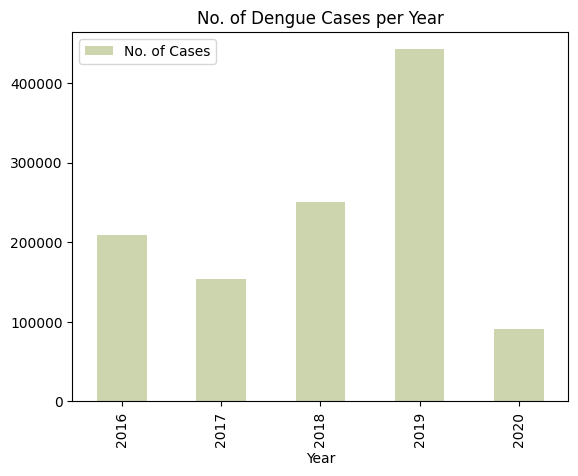

In [13]:
fig_cases_year = cases_year_df.plot.bar(x = "Year", y = "No. of Cases", color="#ccd5ae", title="No. of Dengue Cases per Year")

The year `2019` has the **highest** number of cases at **441902**, while `2020` has the **lowest** number of cases at **91041**.

#### Total Number of Cases Per Region

This will output the total number of cases in the Philipines from 2016-2020 per region.

In [14]:
cases_region_df = cases_df.groupby('Region', as_index=False).agg({'Dengue_Cases':'sum'})
cases_region_df.rename(columns={'Dengue_Cases':'No. of Cases'}, inplace=True)
print(cases_region_df)

         Region  No. of Cases
0         BARMM         11537
1           CAR         30582
2           NCR        115966
3      Region I         59066
4     Region II         45141
5    Region III        131064
6   Region IV-A        163029
7   Region IV-B         30849
8     Region IX         47781
9      Region V         22167
10    Region VI        117523
11   Region VII        110683
12  Region VIII         51983
13     Region X         82437
14    Region XI         32522
15   Region XII         59802
16  Region XIII         35293


For visualization, a bar plot is provided.

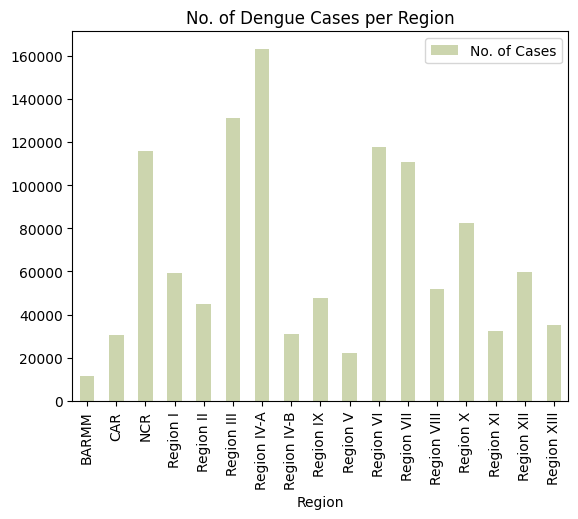

In [15]:
fig_cases_region = cases_region_df.plot.bar(x = "Region", y = "No. of Cases", color="#ccd5ae", title="No. of Dengue Cases per Region")

`Region IV-A` has the **highest** number of cases at **163029**, while `BARMM` has the **lowest** number of cases at **11537**.

It is insufficient to only check the number of cases; we also need to examine the total number of deaths over time in all regions, as well as per year and per region.

### Total Number of Deaths from 2016-2020

This will output the total number of deaths from dengue in the Philipines from 2016-2020 in all regions.

In [16]:
total_deaths = cases_df['Dengue_Deaths'].sum()
print("Total number of dengue deaths in the Philippines: ",total_deaths)

Total number of dengue deaths in the Philippines:  16844


#### Total Number of Deaths Per Year

This will output the total number of deaths from dengue in the Philipines in all regions per year.

In [17]:
deaths_year_df = cases_df.groupby('Year', as_index=False).agg({'Dengue_Deaths':'sum'})
deaths_year_df.rename(columns={'Dengue_Deaths':'No. of Deaths'}, inplace=True)
print(deaths_year_df)

   Year  No. of Deaths
0  2016           8127
1  2017           4563
2  2018           1226
3  2019           1733
4  2020           1195


For visualization, a bar plot is provided.

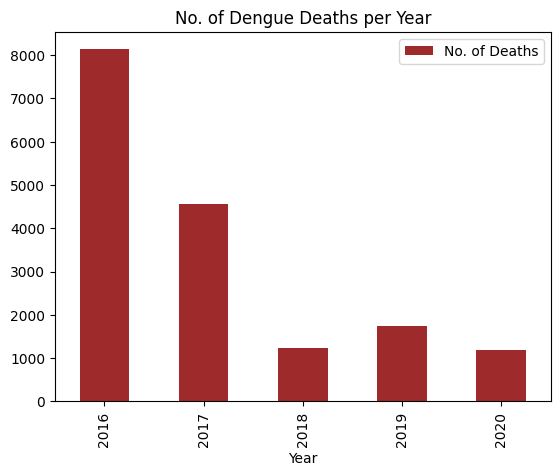

In [18]:
fig_deaths_year = deaths_year_df.plot.bar(x = "Year", y = "No. of Deaths", color="#9e2a2b", title="No. of Dengue Deaths per Year")

The year `2016` has the **highest** number of deaths at **8127**, while `2020` has the **lowest** number of deaths at **1195**.

#### Total Number of Deaths Per Region

This will output the total number of deaths from dengue in the Philipines from 2016-2020 per region.

In [19]:
deaths_region_df = cases_df.groupby('Region', as_index=False).agg({'Dengue_Deaths':'sum'})
deaths_region_df.rename(columns={'Dengue_Deaths':'No. of Deaths'}, inplace=True)
print(deaths_region_df)

         Region  No. of Deaths
0         BARMM            332
1           CAR           1008
2           NCR           4008
3      Region I            157
4     Region II            193
5    Region III            482
6   Region IV-A            652
7   Region IV-B            130
8     Region IX            532
9      Region V            185
10    Region VI           1825
11   Region VII           1760
12  Region VIII            585
13     Region X            848
14    Region XI            385
15   Region XII           2796
16  Region XIII            966


For visualization, a bar plot is provided.

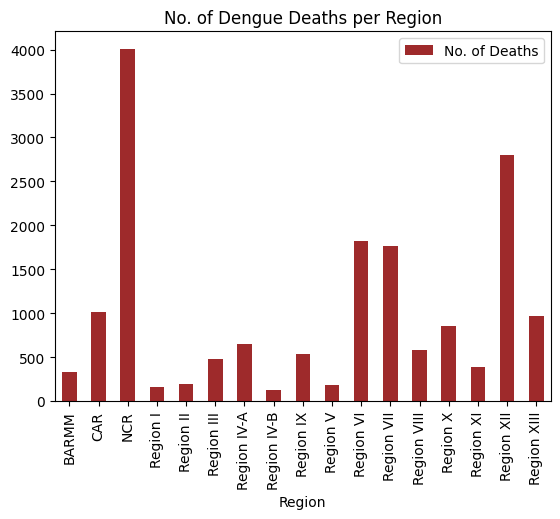

In [20]:
fig_deaths_region = deaths_region_df.plot.bar(x = "Region", y = "No. of Deaths", color="#9e2a2b", title="No. of Dengue Deaths per Region")

`NCR` has the **highest** number of deaths at **4008**, while `Region IV-B` has the **lowest** number of deaths at **130**.

### Initial Observations
- There are a total of `1 020 rows and 5 columns`.
- There are, in total, `1 147 425 dengue cases` in the Philippines from 2016-2020.
- There are, in total, `16 844 dengue deaths` in the Philippines from 2016-2020.

## Cleaning the Dataset

-- [Return to Table of Contents](#DATA100-FINAL-PROJECT) --

Before we can begin exploring the data, we must first clean the dataset. This is to prevent inconsistencies that may cause problems or errors during analysis.

First, we check if there are any duplicated data in the dataset. We do this by calling the [duplicated](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. The function checks and returns the duplicated values.

In [21]:
duplicated = cases_df[cases_df.duplicated()]
dupes = str(duplicated.shape)

print("Number of duplicates: "  + dupes[1 : (dupes.find(','))])

Number of duplicates: 0


As displayed above there are **``0 duplicates``** in the dataset. If there are duplicates, these can be simply removed by calling the [drop_duplicates](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html) function.

Next, we check if each columns has **NaN or Null** values.

In [22]:
cases_df.isnull().any()

Month            False
Year             False
Region           False
Dengue_Cases     False
Dengue_Deaths    False
dtype: bool

From the results above, it can be seen that there are **no NaN or Null Values** in the dataset.

Since there are no null values, the only column/s needed to be cleaned are:
- `Region`

For the **`Region Column`**, we will check the region names.

In [23]:
old_labels = np.sort(cases_df['Region'].unique())

We have noticed that some region names are redundant, with them containing the word **Region**. 

We decided to replace these region names by removing the word *Region* in them. The output in the next cell shows the comparison of the **old labels vs new labels**.

In [24]:
new_labels = ['BARMM', 'CAR', 'NCR', 'I', 'II', 'III', 'IV-A', 'IV-B', 'IX', 'V', 'VI', 'VII', 'VIII', 'X', 'XI', 'XII', 'XIII']

compare = "\n".join("{:30} {}".format(x, y) for x, y in zip(old_labels, new_labels))
cases_df['Region'] = cases_df['Region'].replace(old_labels, new_labels)
print(compare)

BARMM                          BARMM
CAR                            CAR
NCR                            NCR
Region I                       I
Region II                      II
Region III                     III
Region IV-A                    IV-A
Region IV-B                    IV-B
Region IX                      IX
Region V                       V
Region VI                      VI
Region VII                     VII
Region VIII                    VIII
Region X                       X
Region XI                      XI
Region XII                     XII
Region XIII                    XIII


Now that we have cleaned the data, we can now begin with the [Exploratory Data Analysis](#exploratory-data-analysis).

## Exploratory Data Analysis

-- [Return to Table of Contents](#DATA100-FINAL-PROJECT) --

For this section, we explore the initial details and patterns of data found in the Dengue dataset.

### Question 1: What is the trend in dengue cases from 2016 to 2020?

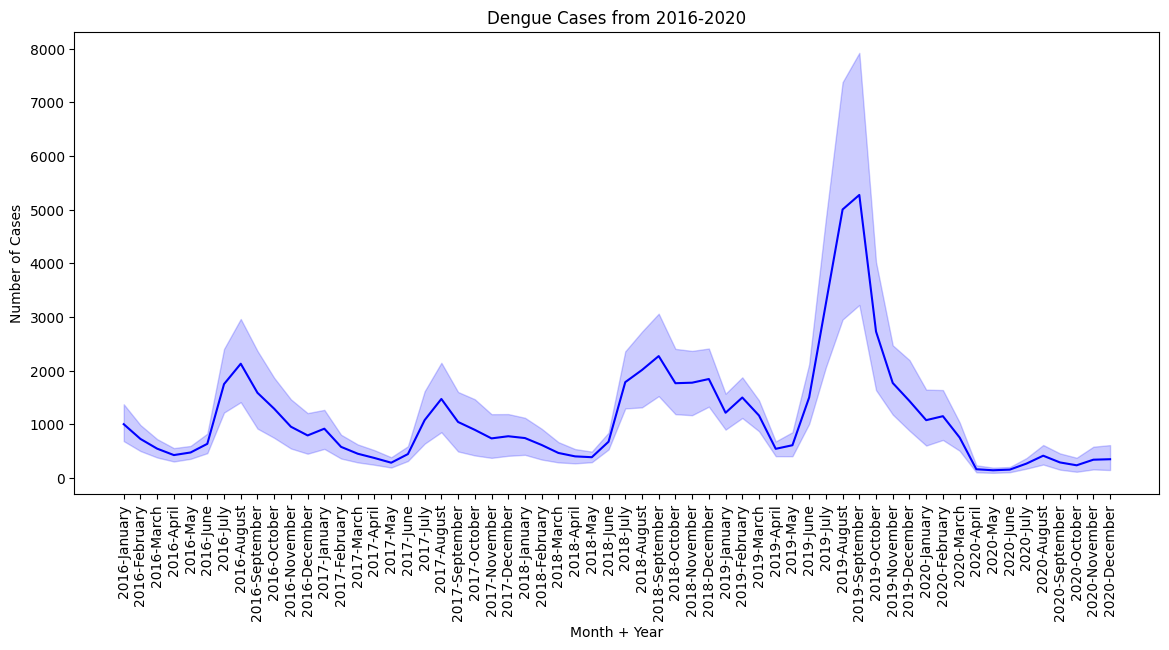

In [25]:
index = 0
date = []
years = [i for i in cases_df.Year]

for i in cases_df.Month:
    date.append(str(years[index])+'-'+str(i))
    index += 1

plt.figure(figsize=(14,6))
sns.lineplot(x=date,y=[i for i in cases_df['Dengue_Cases']],color='blue')
plt.title(label='Dengue Cases from 2016-2020')
plt.xlabel(xlabel='Month + Year')
plt.ylabel(ylabel='Number of Cases')
plt.xticks(rotation=90)
plt.show()

### Question 1 Results
Based on the figure above, it can be observed that **every year, from 2016 to 2019, dengue cases would spike from June to February**. This may be due to the fact that June to February is the typical rainy season in the Philippines [(Philippine Atmospheric, Geophysical and Astronomical Services Administration [PAG-ASA], n.d.)](https://www.pagasa.dost.gov.ph/information/climate-philippines); therefore, water would collect in different areas such as gutters and drains which serve as the breeding ground for mosquitoes [(Santos, 2019)](https://www.aljazeera.com/news/2019/9/17/philippines-worst-dengue-outbreak-in-years-kills-over-a-thousand). However, come **2019**, it can be seen that the **spike in cases from June to July was significantly larger** than the increase during the previous years. 

Additionally, the **dengue cases in 2019 is relatively higher** compared to the previous years. This shows that there was a dengue outbreak in the country in 2019. It can also be observed that there was a **downtrend in the cases from September 2019 to December 2020** which may have been influenced by the COVID-19 quarantine restrictions.


### Question 2: What is the mean and variance in the yearly dengue cases from 2016 to 2020?

In [26]:
cleanDF = cases_df.copy()
regionCases2016 = []
regionCases2017 = []
regionCases2018 = []
regionCases2019 = []
regionCases2020 = []

#separate the data per year
tempDF2016 = cleanDF.query("Year == 2016")
tempDF2017 = cleanDF.query("Year == 2017")
tempDF2018 = cleanDF.query("Year == 2018")
tempDF2019 = cleanDF.query("Year == 2019")
tempDF2020 = cleanDF.query("Year == 2020")



In [27]:
tempDF2016.mean()

C:\Users\beafa\AppData\Local\Temp\ipykernel_25400\3479381574.py:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



Year             2016.000000
Dengue_Cases     1027.176471
Dengue_Deaths      39.838235
dtype: float64

In [28]:
#get all cases per region on 2016 and adding all 12 months per region into a single value
for i in np.unique(tempDF2016['Region']):
    tempDF2 = tempDF2016.query("Region == '{}'".format(i))
    regionCases2016.append([sum([i for i in tempDF2['Dengue_Cases']]),i])

#get all cases per region on 2017 and adding all 12 months per region into a single value
for i in np.unique(tempDF2017['Region']):
    tempDF2 = tempDF2017.query("Region == '{}'".format(i))
    regionCases2017.append([sum([i for i in tempDF2['Dengue_Cases']]),i])

#get all cases per region on 2018 and adding all 12 months per region into a single value
for i in np.unique(tempDF2018['Region']):
    tempDF2 = tempDF2018.query("Region == '{}'".format(i))
    regionCases2018.append([sum([i for i in tempDF2['Dengue_Cases']]),i])

#get all cases per region on 2019 and adding all 12 months per region into a single value
for i in np.unique(tempDF2019['Region']):
    tempDF2 = tempDF2019.query("Region == '{}'".format(i))
    regionCases2019.append([sum([i for i in tempDF2['Dengue_Cases']]),i])

#get all cases per region on 2020 and adding all 12 months per region into a single value
for i in np.unique(tempDF2020['Region']):
    tempDF2 = tempDF2020.query("Region == '{}'".format(i))
    regionCases2020.append([sum([i for i in tempDF2['Dengue_Cases']]),i])

In [29]:
mean2016 = []
mean2017 = []
mean2018 = []
mean2019 = []
mean2020 = []
meanYear = []
varYear = []

#Gather all number of cases into a single list
for i in range(len(new_labels)):
  mean2016.append(regionCases2016[i][0])
  mean2017.append(regionCases2017[i][0])
  mean2018.append(regionCases2018[i][0])
  mean2019.append(regionCases2019[i][0])
  mean2020.append(regionCases2020[i][0])

meanYear.append(sum(mean2016) / len(regionCases2016))
meanYear.append(sum(mean2017) / len(regionCases2017))
meanYear.append(sum(mean2018) / len(regionCases2018))
meanYear.append(sum(mean2019) / len(regionCases2019))
meanYear.append(sum(mean2020) / len(regionCases2020))

varYear.append(statistics.variance(mean2016))
varYear.append(statistics.variance(mean2017))
varYear.append(statistics.variance(mean2018))
varYear.append(statistics.variance(mean2019))
varYear.append(statistics.variance(mean2020))

#mean and variance cases per year
print("Mean Cases per Year")
print("2016 - ", meanYear[0])
print("2017 - ", meanYear[1])
print("2018 - ", meanYear[2])
print("2019 - ", meanYear[3])
print("2020 - ", meanYear[4])
print("\nVariance per Year")
print("2016 - ", varYear[0])
print("2017 - ", varYear[1])
print("2018 - ", varYear[2])
print("2019 - ", varYear[3])
print("2020 - ", varYear[4])

Mean Cases per Year
2016 -  12326.117647058823
2017 -  9067.941176470587
2018 -  14751.941176470587
2019 -  25994.235294117647
2020 -  5355.35294117647

Variance per Year
2016 -  75601384.61029412
2017 -  67824475.80882353
2018 -  92672648.93382353
2019 -  368154444.9411765
2020 -  17372712.49264706


The resulting means and variances per year are plotted in the following bar graphs as shown below.

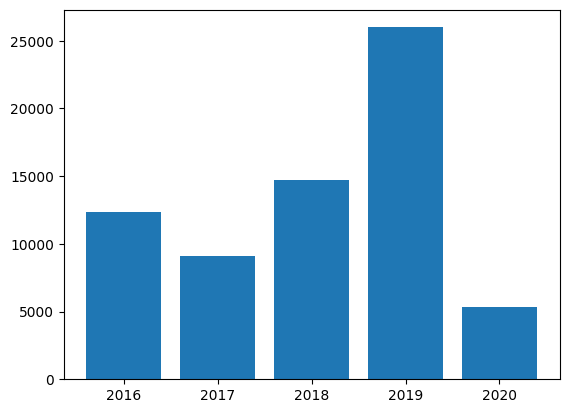

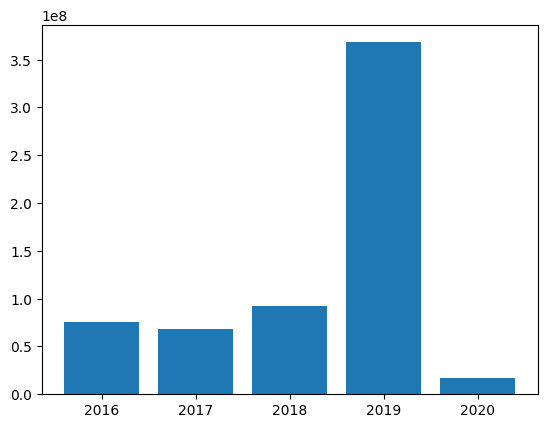

In [30]:
x = [2016, 2017, 2018, 2019, 2020]

plt.bar(x, meanYear)
plt.show()

plt.bar(x, varYear)
plt.show()

### Question 2 Results

The year **2019 has the highest number of dengue cases** with a mean value of **25,994.24** and variance value of **368,154,444.94**. The year with the **lowest number of dengue cases is 2020** with mean value of **5,355.35** and variance value of **17,372,712.49**. At first glance, it would seem pretty clear which one is highest and lowest. However, further statistical analysis must be conducted to validate the hypothesis.

### Question 3: What is the trend in the number of dengue deaths from 2016 to 2020?

Similar processing steps as Question 1 are followed, except this time the values being used are the number of dengue deaths.

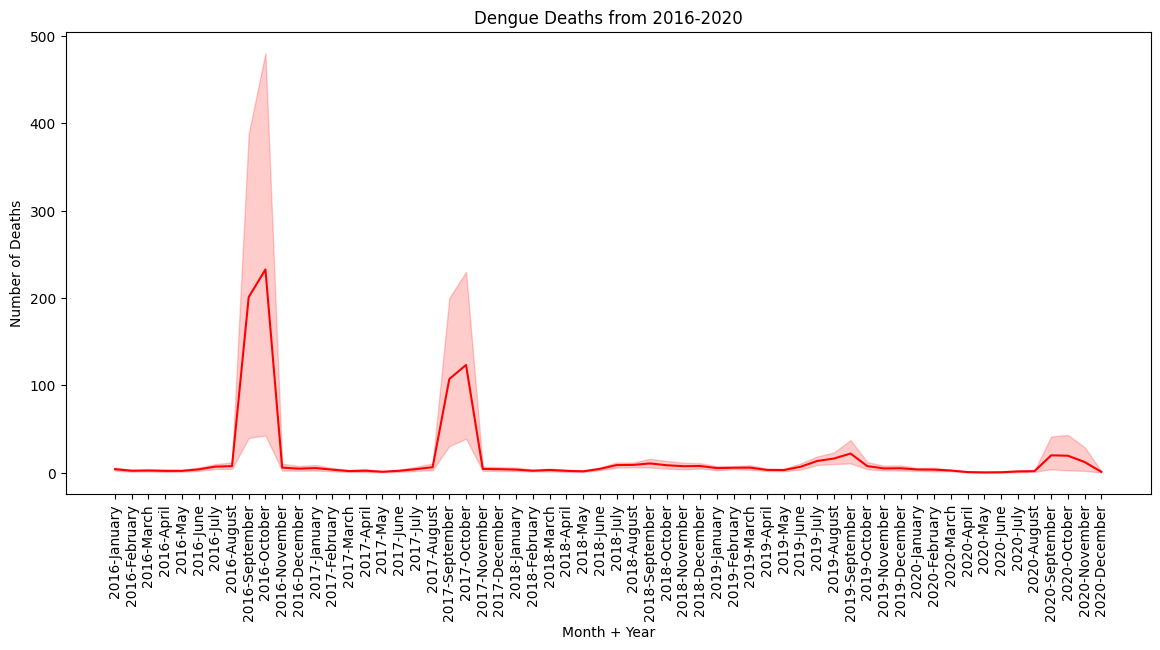

In [31]:
index = 0
date = []
years = [i for i in cases_df.Year]

for i in cases_df.Month:
    date.append(str(years[index])+'-'+str(i))
    index += 1

plt.figure(figsize=(14,6))
sns.lineplot(x=date,y=[i for i in cases_df['Dengue_Deaths']],color='red')
plt.title(label='Dengue Deaths from 2016-2020')
plt.xlabel(xlabel='Month + Year')
plt.ylabel(ylabel='Number of Deaths')
plt.xticks(rotation=90)
plt.show()

### Question 3 Results

The line graph shows that the number of dengue deaths greatly increased starting August 2016, then **reached its peak in October 2016**. Another slight increased then occurred starting around August 2017, leading into a **moderate spike in October 2017**. The number then **remains relatively low until 2020**, but very slight increases can also be observed around the months of August to October in both 2019 and 2020.

Given that the observed increases occur around the same months (August-October) each year, weather may be a possible factor to such results due to the rainy season occurring in the Philippines from June to November (PAG-ASA, n.d.).

### Question 4: What is the mean and variance in the yearly dengue deaths from 2016 to 2020?

Similar processing steps as Question 2 are followed, except again, the values being used are the number of dengue deaths this time around.

In [32]:
cleanDF = cases_df.copy()
regionDeaths2016 = []
regionDeaths2017 = []
regionDeaths2018 = []
regionDeaths2019 = []
regionDeaths2020 = []

#separate the data per year
tempDF2016 = cleanDF.query("Year == 2016")
tempDF2017 = cleanDF.query("Year == 2017")
tempDF2018 = cleanDF.query("Year == 2018")
tempDF2019 = cleanDF.query("Year == 2019")
tempDF2020 = cleanDF.query("Year == 2020")

In [33]:
#get all deaths per region on 2016 and adding all 12 months per region into a single value
for i in np.unique(tempDF2016['Region']):
    tempDF3 = tempDF2016.query("Region == '{}'".format(i))
    regionDeaths2016.append([sum([i for i in tempDF3['Dengue_Deaths']]),i])

#get all deaths per region on 2017 and adding all 12 months per region into a single value
for i in np.unique(tempDF2017['Region']):
    tempDF3 = tempDF2017.query("Region == '{}'".format(i))
    regionDeaths2017.append([sum([i for i in tempDF3['Dengue_Deaths']]),i])

#get all deaths per region on 2018 and adding all 12 months per region into a single value
for i in np.unique(tempDF2018['Region']):
    tempDF3 = tempDF2018.query("Region == '{}'".format(i))
    regionDeaths2018.append([sum([i for i in tempDF3['Dengue_Deaths']]),i])

#get all deaths per region on 2019 and adding all 12 months per region into a single value
for i in np.unique(tempDF2019['Region']):
    tempDF3 = tempDF2019.query("Region == '{}'".format(i))
    regionDeaths2019.append([sum([i for i in tempDF3['Dengue_Deaths']]),i])

#get all deaths per region on 2020 and adding all 12 months per region into a single value
for i in np.unique(tempDF2020['Region']):
    tempDF3 = tempDF2020.query("Region == '{}'".format(i))
    regionDeaths2020.append([sum([i for i in tempDF3['Dengue_Deaths']]),i])

In [34]:
mean2016 = []
mean2017 = []
mean2018 = []
mean2019 = []
mean2020 = []
meanYear =[]
varYear = []

#Gather all number of deaths into a single list
for i in range(len(new_labels)):
  mean2016.append(regionDeaths2016[i][0])
  mean2017.append(regionDeaths2017[i][0])
  mean2018.append(regionDeaths2018[i][0])
  mean2019.append(regionDeaths2019[i][0])
  mean2020.append(regionDeaths2020[i][0])

meanYear.append(sum(mean2016) / len(regionDeaths2016))
meanYear.append(sum(mean2017) / len(regionDeaths2017))
meanYear.append(sum(mean2018) / len(regionDeaths2018))
meanYear.append(sum(mean2019) / len(regionDeaths2019))
meanYear.append(sum(mean2020) / len(regionDeaths2020))

varYear.append(statistics.variance(mean2016))
varYear.append(statistics.variance(mean2017))
varYear.append(statistics.variance(mean2018))
varYear.append(statistics.variance(mean2019))
varYear.append(statistics.variance(mean2020))

#mean and variance deaths per year
print("Mean Deaths per Year")
print("2016 - ", meanYear[0])
print("2017 - ", meanYear[1])
print("2018 - ", meanYear[2])
print("2019 - ", meanYear[3])
print("2020 - ", meanYear[4])
print("\nVariance per Year")
print("2016 - ", varYear[0])
print("2017 - ", varYear[1])
print("2018 - ", varYear[2])
print("2019 - ", varYear[3])
print("2020 - ", varYear[4])

Mean Deaths per Year
2016 -  478.05882352941177
2017 -  268.4117647058824
2018 -  72.11764705882354
2019 -  101.94117647058823
2020 -  70.29411764705883

Variance per Year
2016 -  767287.1838235294
2017 -  171591.63235294117
2018 -  2333.235294117647
2019 -  5332.558823529412
2020 -  14434.095588235294


The resulting means and variances per year are plotted in the following bar graphs as shown below.

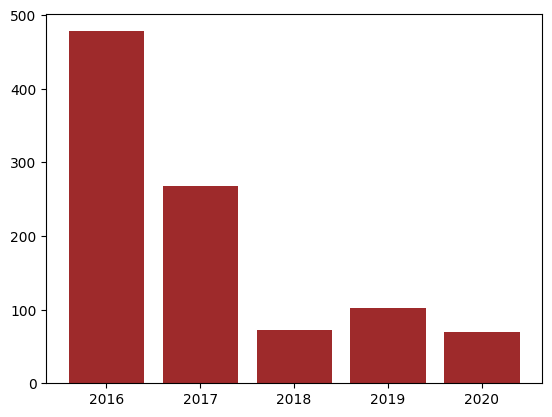

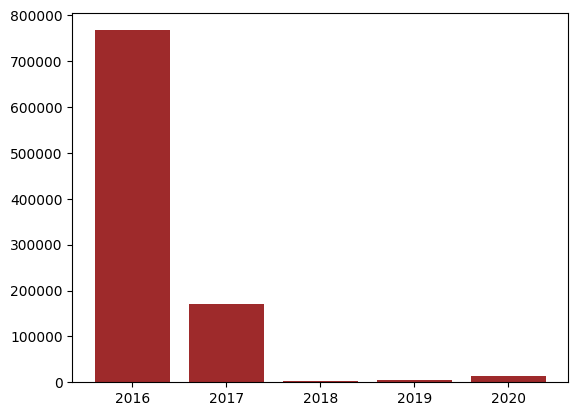

In [35]:
x = [2016, 2017, 2018, 2019, 2020]

plt.bar(x, meanYear, color='#9e2a2b')
plt.show()

plt.bar(x, varYear, color='#9e2a2b')
plt.show()

### Question 4 Results

The year **2016 has the highest number of dengue deaths** with a mean value of **478.05** and variance value of **767,287.18**. The year with the **lowest number of dengue cases is 2020** with mean value of **70.29** and variance value of **14,434.09**. Similar to the number of dengue cases, at first glance it would also seem pretty clear which one is highest and lowest, but further statistical analysis is still needed to validate the hypothesis.

### Question 5: What is the trend in the dengue fatality rate from 2016 to 2020?

The **case fatality rate** is a measure of disease severity, which is defined as the proportion of total deaths in the total number of cases at a specific time (Shabir, 2021). To chart the trend on a line graph, the ratio of deaths to cases is retrieved for each month and year.

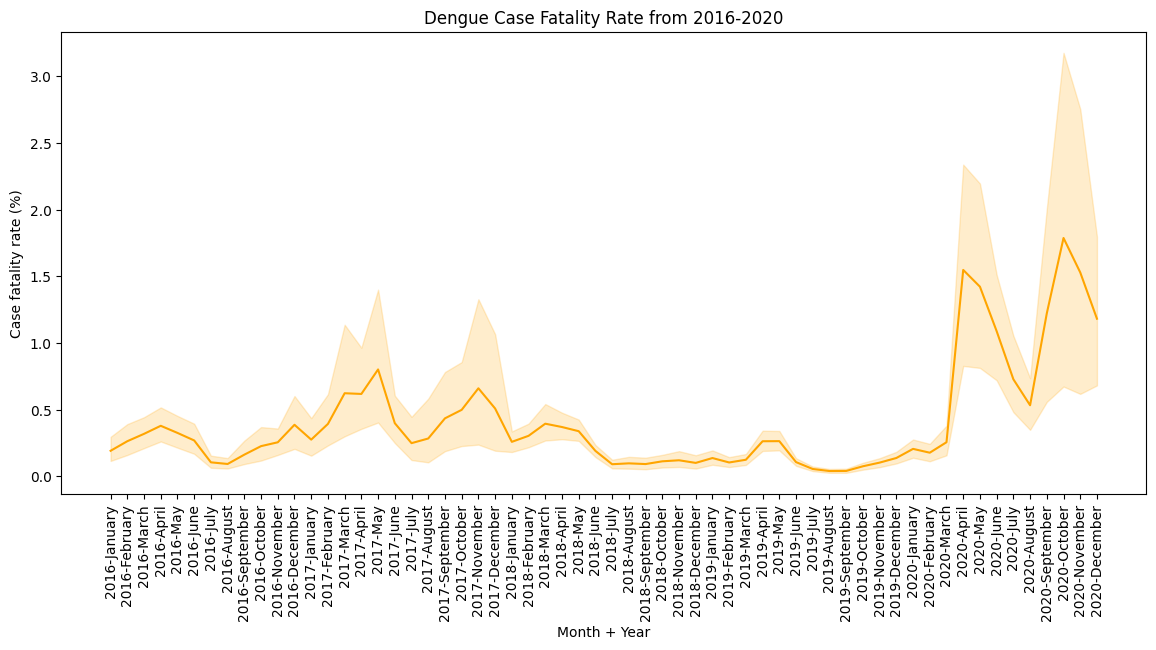

In [36]:
cases = [i for i in cleanDF.Dengue_Cases]
deaths = [i for i in cleanDF.Dengue_Deaths]
ratios = []
index = 0

for i in cases:
    # compute death to case ratio and append to ratio list
    ratios.append(deaths[index]/i *100)
plt.figure(figsize=(14,6))
sns.lineplot(x=date,y=ratios,color='orange')
plt.title(label='Dengue Case Fatality Rate from 2016-2020')
plt.xlabel(xlabel='Month + Year')
plt.ylabel(ylabel='Case fatality rate (%)')
plt.xticks(rotation=90)
plt.show()

In [37]:
# computing the correlation among year, cases, and deaths
cases_df.corr(method="pearson")

C:\Users\beafa\AppData\Local\Temp\ipykernel_25400\4126597558.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Year,Dengue_Cases,Dengue_Deaths
Year,1.000000,0.021167,-0.120163
Dengue_Cases,0.021167,1.000000,0.038322
Dengue_Deaths,-0.120163,0.038322,1.000000


### Question 5 Results

The line graph shows that the rate was relatively low in 2016, then there was a moderate increase starting around February to May of 2017 and around August to November of the same year. Interestingly, the case fatality rate **remained low during 2019**, which saw the highest number of cases. The rate **reached its highest values in 2020**, which also saw the least number of cases. This could suggest that the number of dengue cases and deaths may not be highly correlated.

Upon arriving at a computed correlation value of around **0.04**, the numbers of dengue cases and deaths do have a **very low correlation**.

## Feature Extraction

-- [Return to Table of Contents](#DATA100-FINAL-PROJECT) --

After much deliberation and preparation of the given dataset, it is deemed that no additional features are necessary for further analysis, nor would it be advised to extract new features. With that said, we will proceed with the [Data Visualization and Analysis](#Data-Visualization-and-Analysis) portion as intended.



## Data Visualization & Analysis

-- [Return to Table of Contents](#DATA100-FINAL-PROJECT) --

### Question 1: Are there any statistically significant differences in the average number of dengue cases from 2016 to 2020?

Since the question deals with significant differences, a tool that would be helpful to answer the question is the one-way ANOVA test. It is a test to check if there exists a statistically significant difference between the mean values of more than two groups. The reason for choosing a one-way ANOVA test over a two-test ANOVA is because the groups to be evaluated only have one independent variable. 

As such, there will be a need to set up the null hypothesis and alternative hypothesis. We will assume the confidence interval to be at 95%, thus **α = 0.05**. 

`Null Hypothesis` - The means of all groups have no significant differences. <br>
`Alternative Hypothesis` - There exists a significant difference in the means of the groups. 

In [38]:
#one-way ANOVA
fstat, pval = f_oneway(mean2016, mean2017, mean2018, mean2019, mean2020)
print("The pvalue is", pval)

if pval > 0.05:
    print("Accept null hypothesis")
else:
    print("Reject null hypothesis")

The pvalue is 0.033273649453936155
Reject null hypothesis


### Question 1 Results

Upon computing the means and variances of the dengue cases per year then performing one-way ANOVA test, the `p-value` is found to be at around **0.00001** which is less than the alpha value of 0.05, showing that **there are significant differences** in the number of dengue cases among the years 2016 to 2020.

### Question 2: Are there any statistically significant differences in the average number of dengue deaths from 2016 to 2020?

In [39]:
#one-way ANOVA
fstat, pval = f_oneway(mean2016, mean2017, mean2018, mean2019, mean2020)
print("The pvalue is", pval)

if pval > 0.05:
    print("There is no statistically significant differences in the deaths due to dengue from 2016 to 2020")
else:
    print("There is a statistically significant difference in the deaths due to dengue from 2016 to 2020")

The pvalue is 0.033273649453936155
There is a statistically significant difference in the deaths due to dengue from 2016 to 2020


### Question 2 Results

Upon computing the means and variances of the dengue deaths per year then performing one-way ANOVA test, the `p-value` is found to be at around **0.03** which is less than the alpha value of 0.05, showing that **there are significant differences** in the number of dengue deaths among the years 2016 to 2020.

### Question 3: Did 2019 have a statistically significant higher number of dengue cases?
Going back to the Mean Cases per Year (Question 2 in the EDA portion), it was seen that 2019 had the highest average number of dengue cases. Therefore, the group wanted to determine if, given a 95% confidence interval, the average number of dengue cases in 2019 is statistically significantly higher as compared to other years. In order to do this, a ttest was conducted.

In [40]:
case_year = cases_df[['Year','Dengue_Cases']]

In [41]:
#this is the mean based on the total number of months (per year there are 204 months (12 months*17 regions)) 
case_year.groupby(['Year'])['Dengue_Cases'].mean()

Year
2016    1027.176471
2017     755.661765
2018    1229.328431
2019    2166.186275
2020     446.279412
Name: Dengue_Cases, dtype: float64

In [42]:
#t-stat 2019 vs 2016
tstat,pval_2016 = stats.ttest_ind(case_year[case_year['Year'] == 2019]['Dengue_Cases'],
               case_year[case_year['Year']== 2016]['Dengue_Cases'])

if pval_2016 > 0.05:
    print('The average number of dengue cases in 2019 is not statistically significantly higher than 2016.')
else:
    print('The average number of dengue cases in 2019 is statistically significantly higher than 2016.')

The average number of dengue cases in 2019 is statistically significantly higher than 2016.


In [43]:
#t-stat 2019 vs 2017
tstat,pval_2017 = stats.ttest_ind(case_year[case_year['Year'] == 2019]['Dengue_Cases'],
               case_year[case_year['Year']== 2017]['Dengue_Cases'])

if pval_2017 > 0.05:
    print('The average number of dengue cases in 2019 is not statistically significantly higher than 2017.')
else:
    print('The average number of dengue cases in 2019 is statistically significantly higher than 2017.')

The average number of dengue cases in 2019 is statistically significantly higher than 2017.


In [44]:
#t-stat 2019 vs 2018
tstat,pval_2018 = stats.ttest_ind(case_year[case_year['Year'] == 2019]['Dengue_Cases'],
               case_year[case_year['Year']== 2018]['Dengue_Cases'])

if pval_2018 > 0.05:
    print('The average number of dengue cases in 2019 is not statistically significantly higher than 2018.')
else:
    print('The average number of dengue cases in 2019 is statistically significantly higher than 2018.')

The average number of dengue cases in 2019 is statistically significantly higher than 2018.


In [45]:
#t-stat 2019 vs 2020
tstat,pval_2020 = stats.ttest_ind(case_year[case_year['Year'] == 2019]['Dengue_Cases'],
               case_year[case_year['Year']== 2020]['Dengue_Cases'])

if pval_2020 > 0.05:
    print('The average number of dengue cases in 2019 is not statistically significantly higher than 2020.')
else:
    print('The average number of dengue cases in 2019 is statistically significantly higher than 2020.')

The average number of dengue cases in 2019 is statistically significantly higher than 2020.


### Discussion of Results from Question 3

Based on the ttest, it was determined that, at a 95% confidence interval, the average number of dengue cases in 2019 was statistically significantly higher than the average number of dengue cases in 2016, 2017, 2018 and 2020. This may be because, in 2019, there was a spike in the number of dengue cases in the country. According to Santos (2019), dengue outbreaks are not uncommon since they are typically observed to happen every four to five years given the changes in weather patterns.

### Question 4: Did 2016 have a statistically significant higher number of dengue deaths?

From the mean number of deaths due to dengue from 2016 to 2020, it was observed that 2016 had the highest average deaths. Therefore, at a 95% confidence interval, we wanted to test if the average number of deaths in 2016 was statistically significantly higher compared to the other years. Similar to what was done in question 3, we also performed ttests. 

In [46]:
deaths_year = cases_df[['Year','Dengue_Deaths']]

In [47]:
#this is the mean based on the total number of months (per year there are 204 months (12 months*17 regions)) 
deaths_year.groupby(['Year'])['Dengue_Deaths'].mean()

Year
2016    39.838235
2017    22.367647
2018     6.009804
2019     8.495098
2020     5.857843
Name: Dengue_Deaths, dtype: float64

In [48]:
tstat,pval_d_2017 = stats.ttest_ind(deaths_year[deaths_year['Year'] == 2016]['Dengue_Deaths'],
               deaths_year[deaths_year['Year']== 2017]['Dengue_Deaths'])

if pval_d_2017 > 0.05:
    print('The average number of dengue deaths in 2016 is not statistically significantly higher than 2017.')
else:
    print('The average number of dengue deaths in 2016 is statistically significantly higher than 2017.')

The average number of dengue deaths in 2016 is not statistically significantly higher than 2017.


In [49]:
tstat,pval_d_2018 = stats.ttest_ind(deaths_year[deaths_year['Year'] == 2016]['Dengue_Deaths'],
               deaths_year[deaths_year['Year']== 2018]['Dengue_Deaths'])

if pval_d_2018 > 0.05:
    print('The average number of dengue deaths in 2016 is not statistically significantly higher than 2018.')
else:
    print('The average number of dengue deaths in 2016 is statistically significantly higher than 2018.')

The average number of dengue deaths in 2016 is statistically significantly higher than 2018.


In [50]:
tstat,pval_d_2019 = stats.ttest_ind(deaths_year[deaths_year['Year'] == 2016]['Dengue_Deaths'],
               deaths_year[deaths_year['Year']== 2019]['Dengue_Deaths'])

if pval_d_2019 > 0.05:
    print('The average number of dengue deaths in 2016 is not statistically significantly higher than 2019.')
else:
    print('The average number of dengue deaths in 2016 is statistically significantly higher than 2019.')

The average number of dengue deaths in 2016 is statistically significantly higher than 2019.


In [51]:
tstat,pval_d_2020 = stats.ttest_ind(deaths_year[deaths_year['Year'] == 2016]['Dengue_Deaths'],
               deaths_year[deaths_year['Year']== 2020]['Dengue_Deaths'])

if pval_d_2020 > 0.05:
    print('The average number of dengue deaths in 2016 is not statistically significantly higher than 2020.')
else:
    print('The average number of dengue deaths in 2016 is statistically significantly higher than 2020.')

The average number of dengue deaths in 2016 is statistically significantly higher than 2020.


### Discussion of Results from Question 4

At a 95% confidence interval, the average death due to dengue in 2016 is not statistically signidicant compared to the average number of deaths in 2017. However, it is statistically significant compared to the average number of deaths in 2018-2020. This is may be an indicator that the average number of deaths due to dengue has significantly declined from 2018 onwards. The higher number of average deaths in 2016 may be attributed to the roll-out of the Dengvaxia vaccine wherein it was found that those who were injected with Dengvaxia and had not history of dengue infection were put at a higher risk of receiveing a more severe form of Dengue virus as compared to those who had prior history of dengue and received the vaccine [(Fatima & Syed, 2018)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6214489/).

## Summary of Findings and Recommendations

-- [Return to Table of Contents](#head) --

The results from our analysis showed that the annual mean and variances of the number of dengue cases in the Philippines based on the total number of regions in the country are statistically significant. It also showed that there was a statistically significant difference in the average number of deaths due to dengue per year. We also tested if the number of dengue cases in 2019, the year which presented the highest average of dengue cases, was statistically significantly higher as compared to other years. We found that compared to the years 2016-2018 and 2020, the average number of dengue cases in 2019 was statistically significantly higher. It was also determined that the average number of deaths due to dengue in 2016 was statistically significantly higher as compared to the average number of deaths in 2017 until 2020.

**Recommendations:** <br>
• For those who would want to use the same dataset, we would suggest for other groups to forecast the predicted number of dengue cases for the succeeding years; however, they will have to do additional steps to account for seasonality in the data. When we were working on the data, we attempted to forecast the number of dengue cases for 2021 using the dataset. However, when we conducted the Augmented Dickey-Fuller test to check the stationarity of the data, it was found that the dataset was not stationary. If we were to create a forecast based on a non-stationary dataset, the predicted results may be biased and inaccurate. <br>

In [52]:
## NOT SURE IF THIS SHOULD STILL BE INCLUDED IN DATA VIS AND ANALYSIS COS PARANG MAS EDA?

case_year = cases_df[['Year','Dengue_Cases']]
#value_counts()
case_year['Year'].value_counts()

#describe()
case_year['Dengue_Cases'].describe()

#mean
case_year.groupby(['Year'])['Dengue_Cases'].mean()

#median
case_year.groupby(['Year'])['Dengue_Cases'].median()

#mode, 2019
case_year[case_year['Year'] == 2019]['Dengue_Cases'].mode()

#mode, every other year
case_year[case_year['Year'] != 2019]['Dengue_Cases'].mode()



0    207
Name: Dengue_Cases, dtype: int64

<Axes: xlabel='Dengue_Cases', ylabel='Density'>

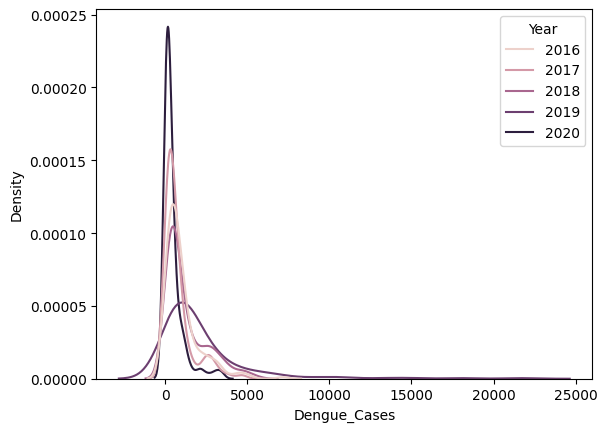

In [53]:
## NOT SURE IF THIS SHOULD STILL BE INCLUDED IN DATA VIS AND ANALYSIS COS PARANG MAS EDA?

#line graph
sns.kdeplot(data = case_year, x= "Dengue_Cases", hue="Year")



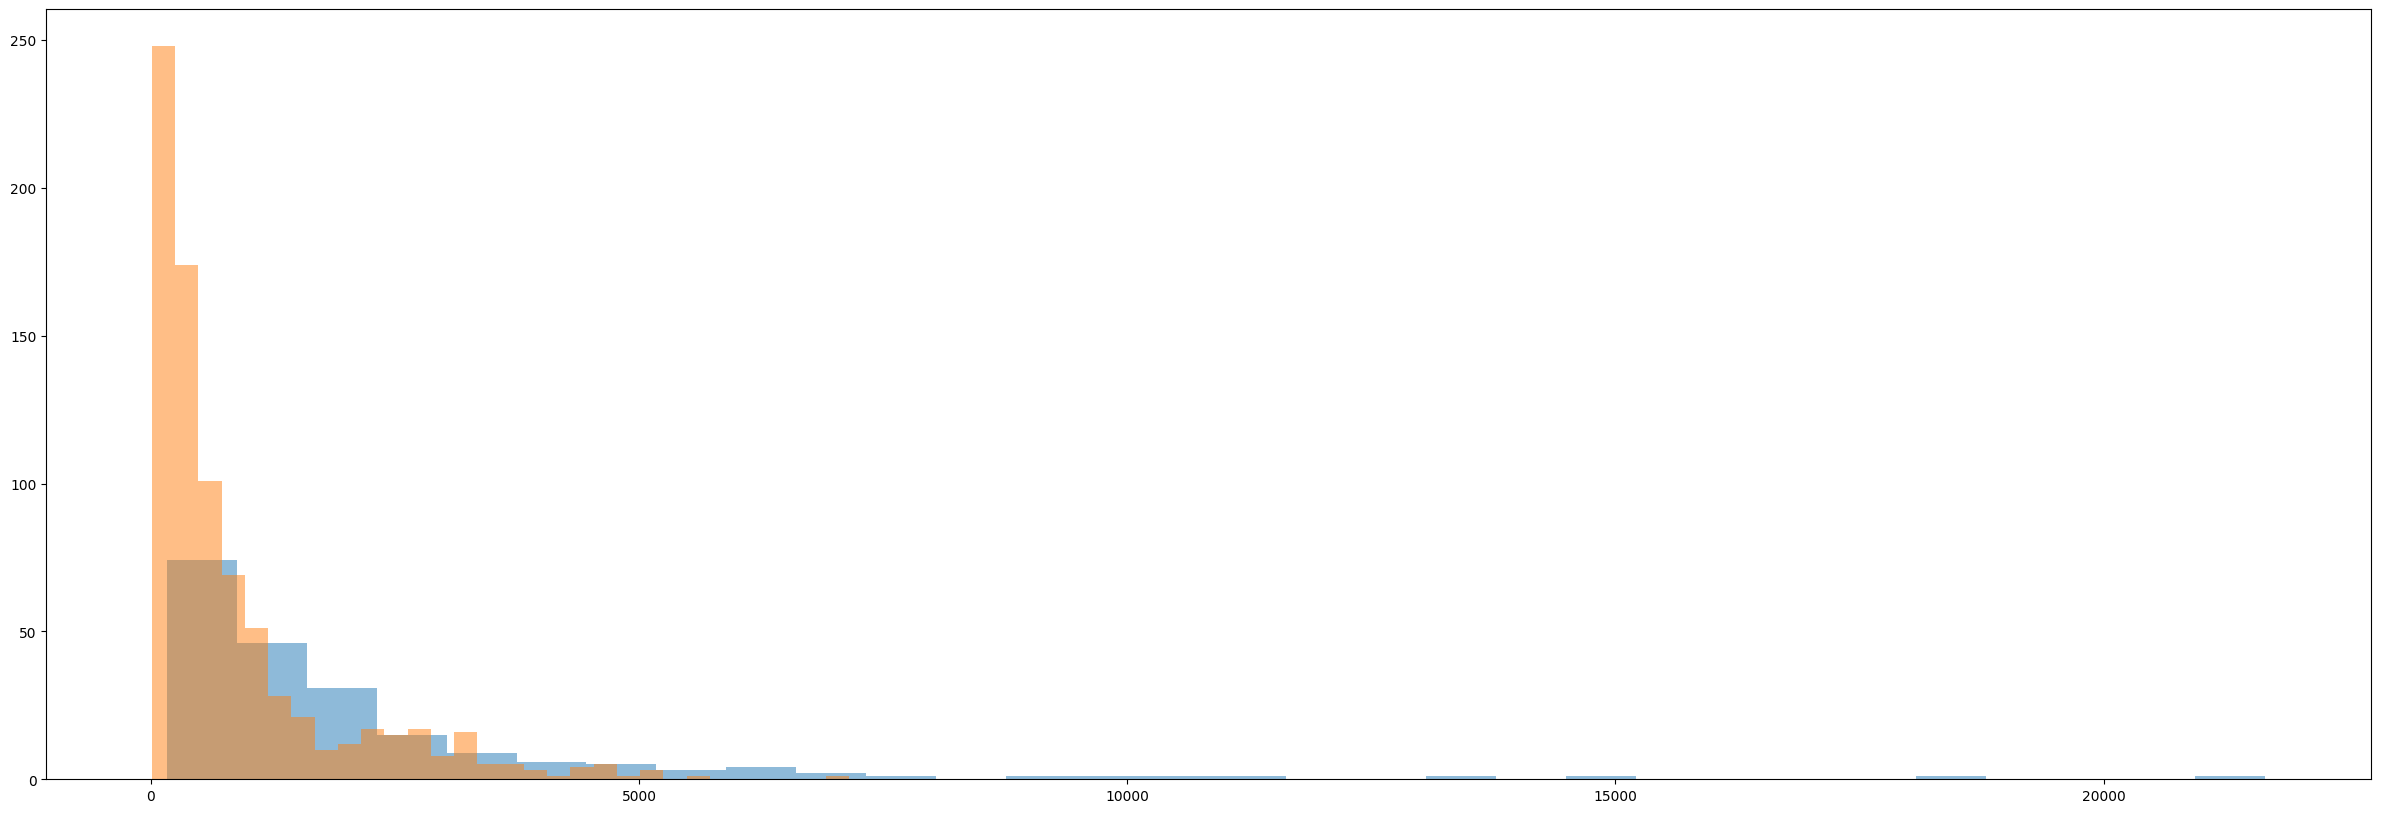

In [54]:
## NOT SURE IF THIS SHOULD STILL BE INCLUDED IN DATA VIS AND ANALYSIS COS PARANG MAS EDA?

#histogram
plt.figure(figsize=(30,10))
plt.hist(case_year[case_year['Year'] == 2019]['Dengue_Cases'], alpha=.5, bins=30)
plt.hist(case_year[case_year['Year'] != 2019]['Dengue_Cases'], alpha=.5, bins=30);

# References

-- [Return to Table of Contents](#head) --

Department of Health. (n.d.). *Dengue*. Department of Health. https://doh.gov.ph/Health-Advisory/Dengue 

Fatima, K., & Syed, N. (2018). *Dengvaxia controversy: impact on vaccine hesitancy.* National Center for Biotechnology Information. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6214489/

Jacklacey. (2022, September 2). *Dengue in the Philippines analysis*. Kaggle. https://www.kaggle.com/code/jacklacey/dengue-in-the-philippines-analysis 

Ong, E. P., Obeles, A. J. T., Ong, B. A. G., & Tantengco, O. A. G. (2022). Perspectives and lessons from the Philippines’ decades-long battle with dengue. In *The Lancet Regional Health - Western Pacific (Vol. 24, p. 100505)*. Elsevier BV. https://doi.org/10.1016/j.lanwpc.2022.100505

Philippine Atmospheric, Geophysical and Astronomical Services Administration. (n.d.). *Climate of the Philippines*. GOVPH. https://www.pagasa.dost.gov.ph/information/climate-philippines 

Santos, A. (2019). *Philippines: Worst dengue outbreak in years kills over a thousand.* AlJazeera. https://www.aljazeera.com/news/2019/9/17/philippines-worst-dengue-outbreak-in-years-kills-over-a-thousand

Shabir, O. (2021, February 17). *What is case fatality rate (CFR)?* News Medical. https://www.news-medical.net/health/What-is-Case-Fatality-Rate-(CFR).aspx 